In [80]:
import unicodecsv 

def read_csv(filename) :
    with open(filename , 'rb') as f :
        reader = unicodecsv.DictReader(f)
        return list(reader)

titanic_data = read_csv('titanic_data.csv')

In [81]:
titanic_data[2]

{'PassengerId': '3',
 'Survived': '1',
 'Pclass': '3',
 'Name': 'Heikkinen, Miss. Laina',
 'Sex': 'female',
 'Age': '26',
 'SibSp': '0',
 'Parch': '0',
 'Ticket': 'STON/O2. 3101282',
 'Fare': '7.925',
 'Cabin': '',
 'Embarked': 'S'}

In [82]:
#questions i wanna know from titanic data 

# 1 : Does the family name have an impact on survival, especially among the rich?

In [83]:
#questions i'm gonna answer from titanic data 

# What factors made people more likely to survive ?

## Fixing Data Types

In [84]:
def parse_maybe_int(i) :
    if i == '' or i == None  :
        return None 
    else : 
        return int(i)
    
def parse_maybe_float(f) :
    if f == '' :
        return None 
    if f == None :
        return None
    else : 
        return float(f)
    

In [85]:
for data_point in titanic_data :
    data_point['PassengerId'] = int(data_point['PassengerId']) 
    data_point['Survived'] = int(data_point['Survived']) 
    data_point['Pclass'] = int(data_point['Pclass'])
    data_point['Age'] = parse_maybe_int(parse_maybe_float(data_point['Age'])) 
    data_point['SibSp'] = int(data_point['SibSp']) 
    data_point['Parch'] = int(data_point['Parch']) 
    data_point['Fare'] = parse_maybe_float(data_point['Fare']) 

In [86]:
len(titanic_data)

891

In [87]:
import pandas as pd 

def get_survived_passengers(data) :
    survived_passengers = [] 
    for data_point in data : 
        key = data_point['PassengerId']
        if data_point['Survived'] :
            survived_passengers.append(data_point) 
    return survived_passengers
        
survived_passengers = get_survived_passengers(titanic_data)

In [148]:
len(survived_passengers)

342

In [127]:
from collections import defaultdict 
age_group = defaultdict(list)
age_group = {'child' : list(range(0,17)) ,'young_adult' : list(range(17,31)) ,'middle_aged_adult' : list(range(31,56)) ,'old_adult' : list(range(56,85))}

In [128]:
for data_point in survived_passengers :
    age = data_point['Age'] 
    for key , val in age_group.items() :
        if age in val :
            data_point['age_label'] = key 
            break 
        elif age == None :
            data_point['age_label'] = 'unfound' 
    
             

In [129]:
survived_passengers[17]

{'PassengerId': 37,
 'Survived': 1,
 'Pclass': 3,
 'Name': 'Mamee, Mr. Hanna',
 'Sex': 'male',
 'Age': None,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': '2677',
 'Fare': 7.2292,
 'Cabin': '',
 'Embarked': 'C',
 'age_label': 'unfound'}

In [130]:
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [164]:
grouped_by_age = pd.Series(group_data(survived_passengers , 'age_label'))
grouped_by_age

middle_aged_adult    [{'PassengerId': 2, 'Survived': 1, 'Pclass': 1...
young_adult          [{'PassengerId': 3, 'Survived': 1, 'Pclass': 3...
child                [{'PassengerId': 10, 'Survived': 1, 'Pclass': ...
old_adult            [{'PassengerId': 12, 'Survived': 1, 'Pclass': ...
unfound              [{'PassengerId': 18, 'Survived': 1, 'Pclass': ...
dtype: object

In [ ]:
grouped_by_age['middle_aged_adult']

In [193]:
number_survivals_by_group = defaultdict(int)
for group in grouped_by_age :
    key = group[0]['age_label']
    number_survivals_by_group[key] = len(group) 
    
number_survivals_by_group = pd.Series(number_survivals_by_group)
number_survivals_by_group

middle_aged_adult    112
young_adult          111
child                 55
old_adult             12
unfound               52
dtype: int64

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

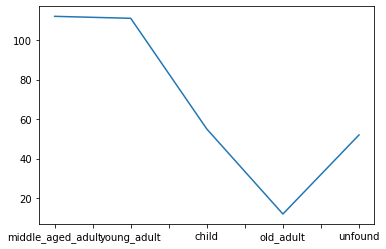

In [196]:
%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns


number_survivals_by_group.plot()